In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd;
train = pd.read_excel('../input/flight-fare-prediction-mh/Data_Train.xlsx');
test = pd.read_excel('../input/flight-fare-prediction-mh/Test_set.xlsx');
ss = pd.read_excel('../input/flight-fare-prediction-mh/Sample_submission.xlsx')

In [10]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.naive_bayes import GaussianNB;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor

In [6]:
train = train.dropna()

In [11]:
le = LabelEncoder();
train['Airline'] = le.fit_transform(train['Airline']);
train['Date_of_Journey'] = le.fit_transform(train['Date_of_Journey']);
train['Source'] = le.fit_transform(train['Source']);
train['Destination'] = le.fit_transform(train['Destination']);
train['Route'] = le.fit_transform(train['Route']);
train['Dep_Time'] = le.fit_transform(train['Dep_Time']);
train['Arrival_Time'] = le.fit_transform(train['Arrival_Time']);
train['Duration'] = le.fit_transform(train['Duration']);
train['Total_Stops'] = le.fit_transform(train['Total_Stops']);
train['Additional_Info'] = le.fit_transform(train['Additional_Info']);


In [12]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


In [13]:
test['Airline'] = le.fit_transform(test['Airline']);
test['Date_of_Journey'] = le.fit_transform(test['Date_of_Journey']);
test['Source'] = le.fit_transform(test['Source']);
test['Destination'] = le.fit_transform(test['Destination']);
test['Route'] = le.fit_transform(test['Route']);
test['Dep_Time'] = le.fit_transform(test['Dep_Time']);
test['Arrival_Time'] = le.fit_transform(test['Arrival_Time']);
test['Duration'] = le.fit_transform(test['Duration']);
test['Total_Stops'] = le.fit_transform(test['Total_Stops']);
test['Additional_Info'] = le.fit_transform(test['Additional_Info']);

In [14]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5


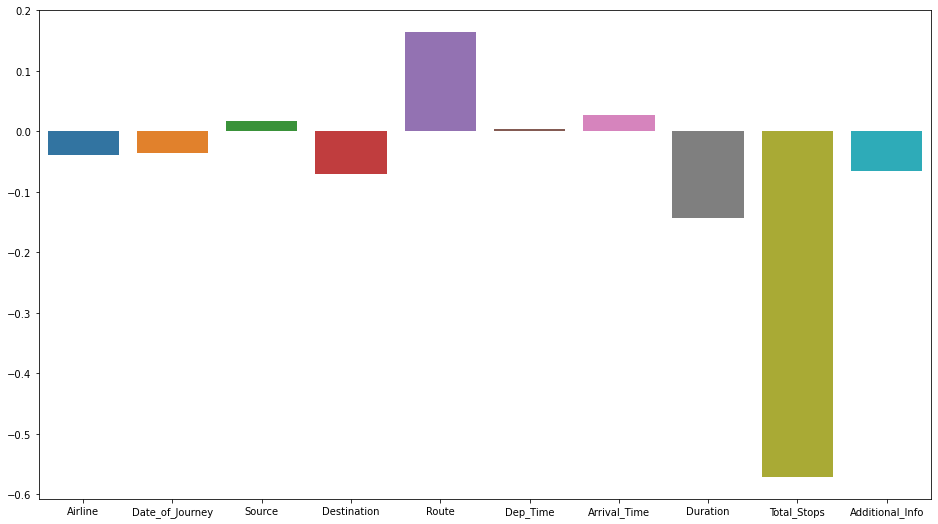

In [15]:
plt.figure(figsize = (16,9))
fineTech_appData3 = train.drop(['Price'], axis = 1) 
sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(train['Price']))



In [16]:
x = train[['Route', 'Duration', 'Total_Stops']];
y = train[['Price']]

In [22]:
test = test[['Route', 'Duration', 'Total_Stops']];

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 55)

In [18]:
xx = XGBRegressor();
xx.fit(xtrain, ytrain);
xx.score(xtest, ytest)

0.5565399474394598

In [ ]:
model = xx.predict(test);
modelData = pd.DataFrame(model, columns = ['Price']);
modelData.set_index('Price').to_csv('submission.csv')

In [19]:
rf = RandomForestRegressor();
rf.fit(xtrain, ytrain);
rf.score(xtest, ytest)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5421501299579878

In [20]:
La = Lasso();
La.fit(xtrain, ytrain);
La.score(xtest, ytest)

0.3224743057896752

In [21]:
dc = DecisionTreeRegressor();
dc.fit(xtrain, ytrain);
dc.score(xtest, ytest)

0.5064731978227757